In [1]:
import numpy as np

# 이상치 미존재
x1 = np.array([10, 9, 3, 2])
y1 = np.array([90, 80, 50, 30])

# 이상치 존재
x2 = np.array([10, 9, 3, 2, 11])
y2 = np.array([90, 80, 50, 30,40])

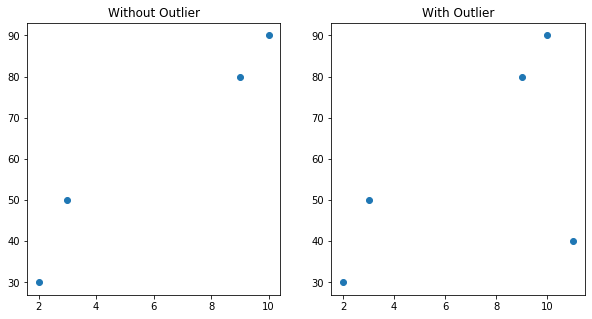

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('With Outlier')
plt.show()

In [3]:
def OLS(x, y):
    w = np.sum((x-x.mean()) * (y-y.mean())) / np.sum((x-x.mean())**2)
    b = y.mean() - w * x.mean()
    return w, b

In [4]:
w1, b1 = OLS(x1, y1)
w1, b1

(6.6, 22.900000000000006)

In [5]:
w2, b2 = OLS(x2, y2)
w2, b2

(3.4285714285714284, 34.0)

In [6]:
x1_pred = x1 * w1 + b1
x2_pred = x2 * w2 + b2

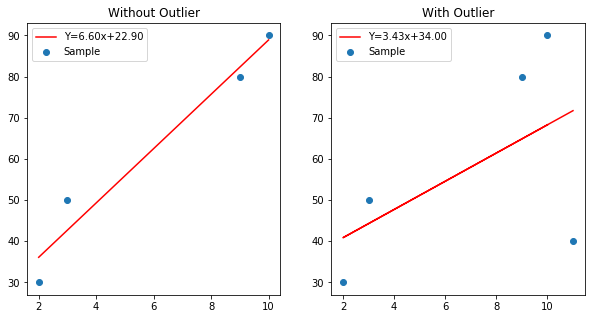

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, label='Sample')
plt.plot(x1, x1_pred, c='red', label=f'Y={w1:.2f}x+{b1:.2f}')
plt.legend()
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, label='Sample')
plt.plot(x2, x2_pred, c='red', label=f'Y={w2:.2f}x+{b2:.2f}')
plt.title('With Outlier')
plt.legend()
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(x1.reshape(-1, 1), y1)
model1.coef_, model1.intercept_

(array([6.6]), 22.899999999999984)

In [9]:
model2 = LinearRegression().fit(x2.reshape(-1, 1), y2)
model2.coef_, model2.intercept_

(array([3.42857143]), 33.99999999999999)

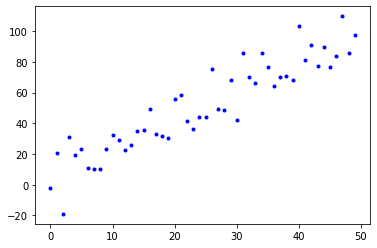

In [10]:
X = np.arange(50)
Y = (2 * X) + 10 * np.random.randn(50)
plt.plot(X, Y, 'b.')

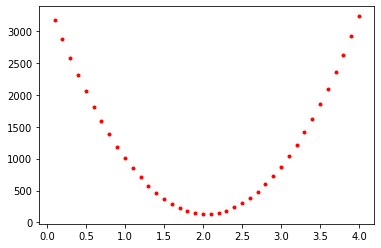

In [11]:
w_range = np.arange(0.1, 4.1, 0.1)
costs = []
for w in w_range:
    h = w * X
    cost = 1 / 50 * np.sum( (h-Y) ** 2)
    costs.append(cost)
plt.plot(w_range, costs, 'r.')

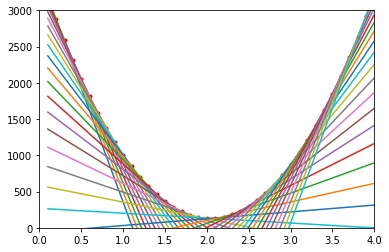

In [12]:
plt.plot(w_range, costs, 'r.')
for w, cost in zip(w_range, costs):
    h = w * X
    gradient = 2 / 50 * np.sum( (h-Y) * X)
    plt.plot(w_range, gradient*(w_range-w)+cost)
    plt.axis([0, 4, 0, 3000])
plt.show() 

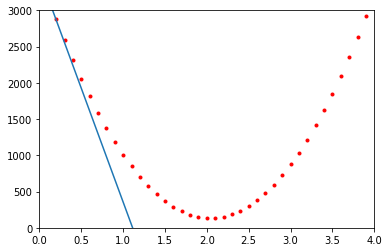

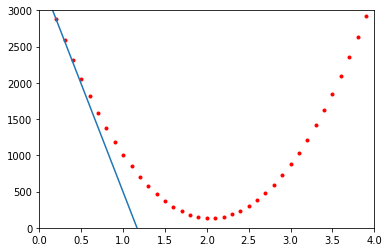

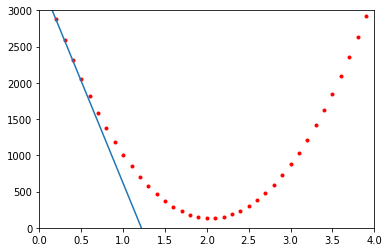

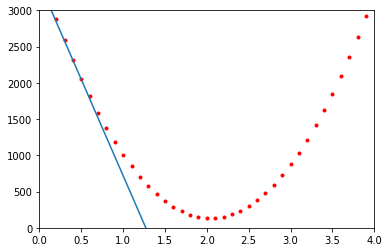

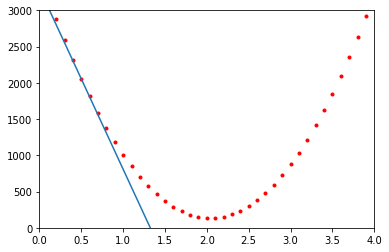

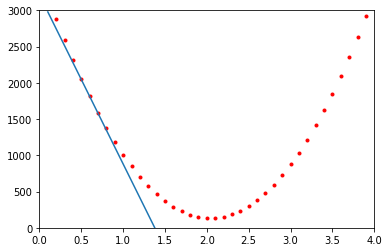

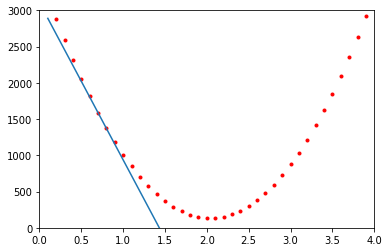

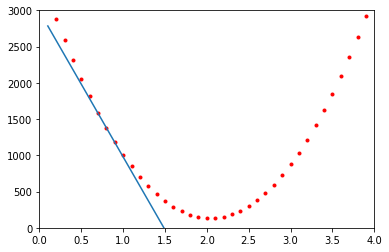

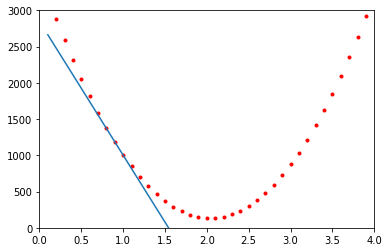

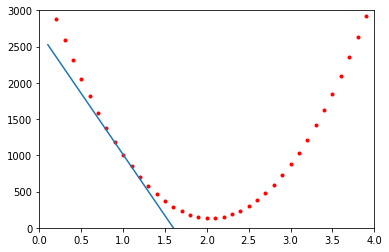

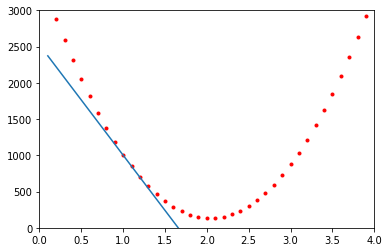

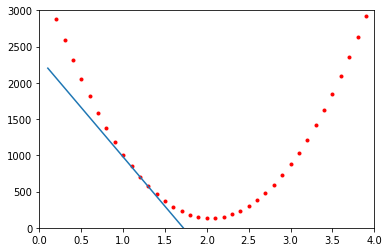

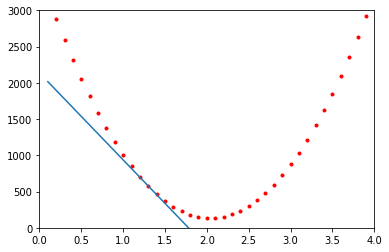

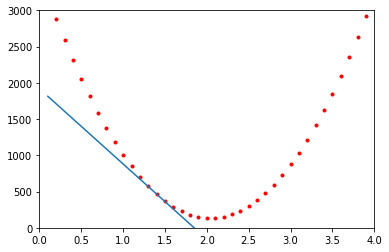

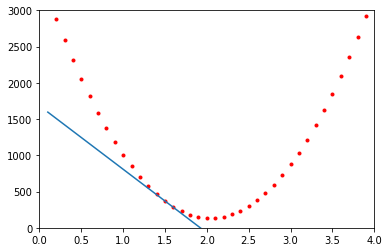

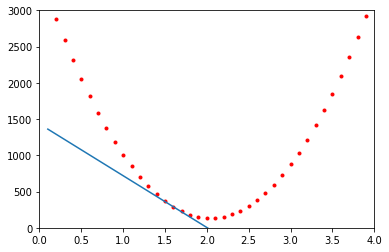

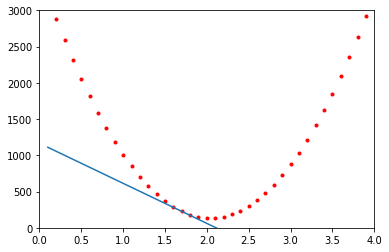

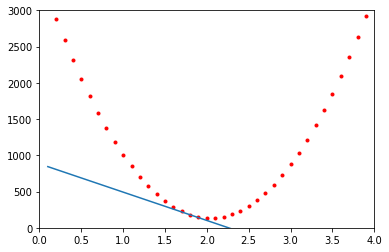

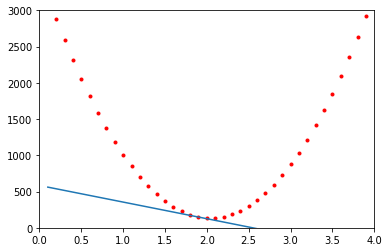

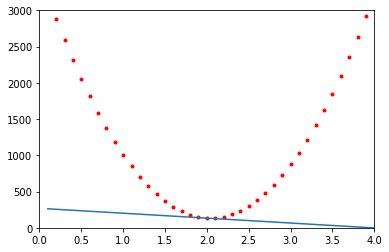

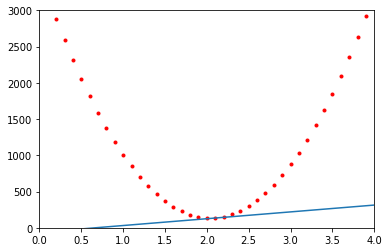

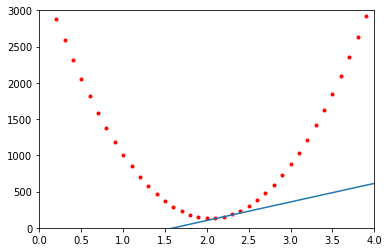

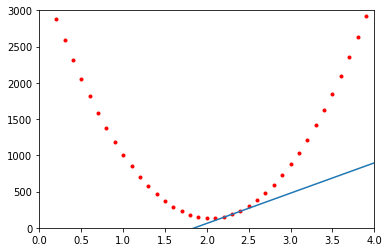

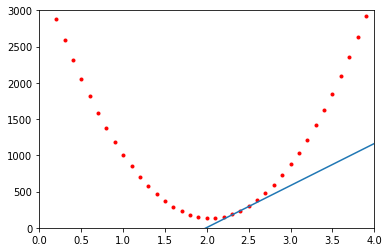

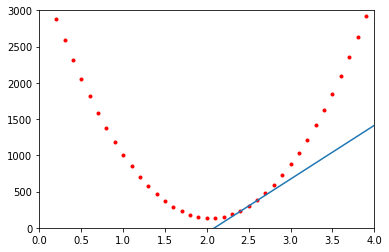

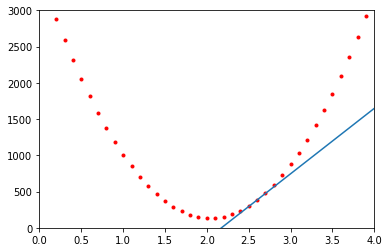

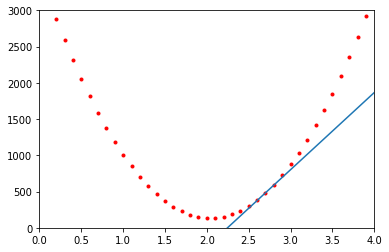

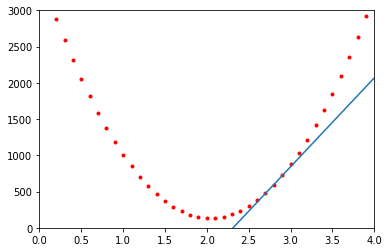

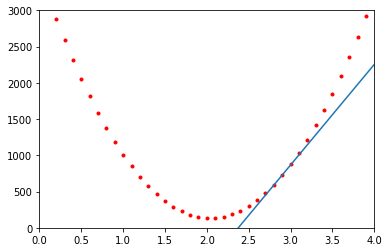

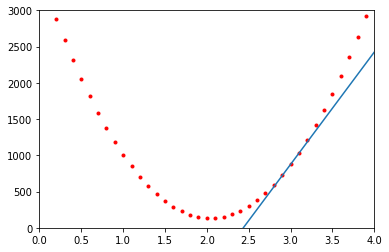

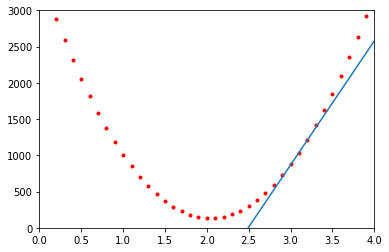

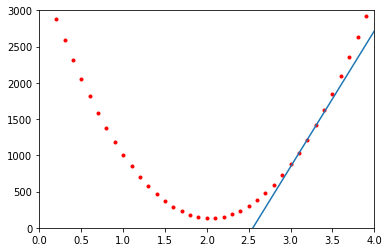

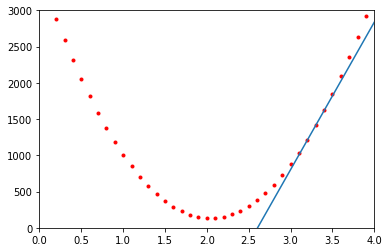

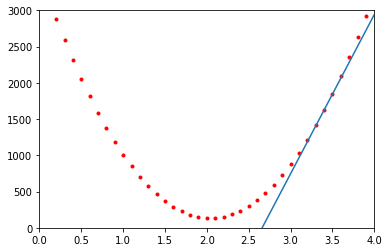

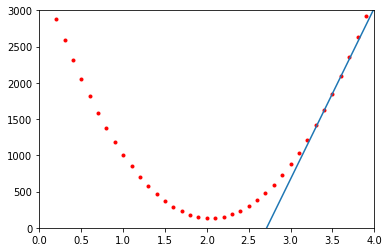

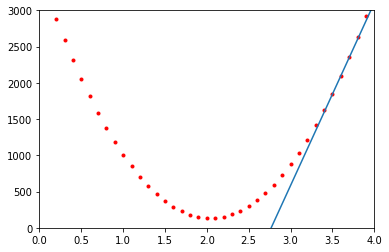

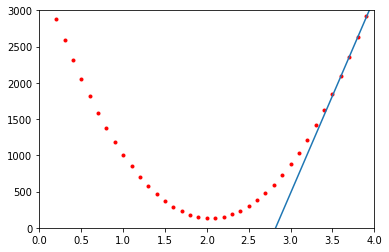

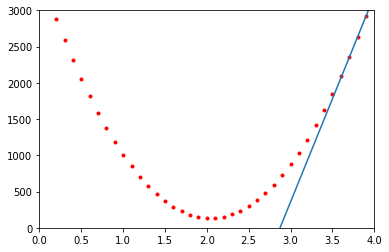

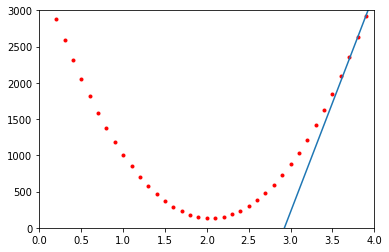

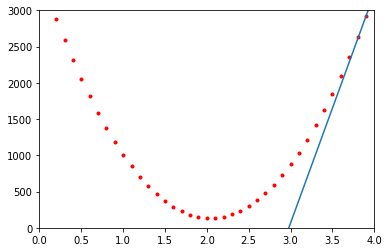

In [14]:
for w, cost in zip(w_range, costs):
    plt.plot(w_range, costs, 'r.')
    h = w * X
    gradient = 2 / 50 * np.sum( (h-Y) * X)
    plt.plot(w_range, gradient*(w_range-w)+cost)
    plt.axis([0, 4, 0, 3000])
    plt.show() 

In [15]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['PRICE'] = boston['target']
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
from sklearn.model_selection import train_test_split
x = df.loc[:, 'CRIM':'LSTAT']
y = df.loc[:, 'PRICE']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.7697699488741149, 0.6354638433202129)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2)
x = np.arange(5).reshape(-1, 1)
pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())

,1,x0,x0^2
0,1.0,0.0,0.0
1,1.0,1.0,1.0
2,1.0,2.0,4.0
3,1.0,3.0,9.0
4,1.0,4.0,16.0


In [19]:
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2)
x = np.arange(10).reshape(-1, 2)
pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())

,1,x0,x1,x0^2,x0 x1,x1^2
0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,2.0,3.0,4.0,6.0,9.0
2,1.0,4.0,5.0,16.0,20.0,25.0
3,1.0,6.0,7.0,36.0,42.0,49.0
4,1.0,8.0,9.0,64.0,72.0,81.0


In [20]:
P = PolynomialFeatures(degree=2, include_bias=False)
x = np.arange(10).reshape(-1, 2)
pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())

,x0,x1,x0^2,x0 x1,x1^2
0,0.0,1.0,0.0,0.0,1.0
1,2.0,3.0,4.0,6.0,9.0
2,4.0,5.0,16.0,20.0,25.0
3,6.0,7.0,36.0,42.0,49.0
4,8.0,9.0,64.0,72.0,81.0


In [31]:
P = PolynomialFeatures(degree=2, include_bias=False)
x_poly = P.fit_transform(df.loc[:, 'CRIM':'LSTAT'])
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)
df.loc[:, 'CRIM':'LSTAT'].shape, x_poly.shape

((506, 13), (506, 104))

In [32]:
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.952051960903273, 0.6074721959640057)

In [33]:
P = PolynomialFeatures(degree=3, include_bias=False)
x_poly = P.fit_transform(df.loc[:, 'CRIM':'LSTAT'])
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, -9443.834519734997)

In [34]:
P = PolynomialFeatures(degree=5, include_bias=False)
x_poly = P.fit_transform(df.loc[:, 'CRIM':'LSTAT'])
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, -135.3050630111862)

In [36]:
P = PolynomialFeatures(degree=3, include_bias=False)
x_poly = P.fit_transform(df.loc[:, 'CRIM':'LSTAT'])
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)

from sklearn.linear_model import Ridge
model = Ridge(alpha=1000000000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9379888013345425, 0.7343396085265297)

In [37]:
from sklearn.preprocessing import MinMaxScaler
P = PolynomialFeatures(degree=3, include_bias=False)
x_scaled = MinMaxScaler().fit_transform(df.loc[:, 'CRIM':'LSTAT'])
y = df.loc[:, 'PRICE']
x_poly = P.fit_transform(x_scaled)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, -238.74562904864584)

In [39]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9242749146283596, 0.7865342899841102)

In [40]:
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)
ridge01.score(x_train, y_train), ridge01.score(x_test, y_test)

(0.9537155397034651, 0.7905570432110404)

In [41]:
ridge10 = Ridge(alpha=10).fit(x_train, y_train)
ridge10.score(x_train, y_train), ridge10.score(x_test, y_test)

(0.8555501939781199, 0.7230747746713162)

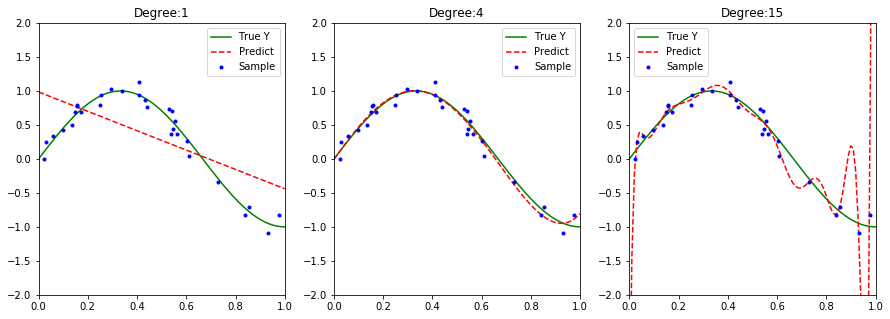

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def sin(X):
    return np.sin(1.5 * np.pi * X)

m = 30
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1

degrees = (1, 4, 15)
plt.figure(figsize=(15,5))
for i, degree  in enumerate(degrees):
    polynomial = PolynomialFeatures(degree=degree)
    lr = LinearRegression()
    pipe = Pipeline([('polynomial', polynomial), ('linear_regression', lr)])
    pipe.fit(X.reshape(-1,1), y)
    
    X_test = np.linspace(0,1, 100)
    plt.subplot(1, len(degrees), i+1)
    plt.plot(X_test, sin(X_test), 'g-', label='True Y')
    plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]),'r--',label='Predict')
    plt.plot(X, y, 'b.', label='Sample')
    plt.xlim((0,1)); plt.ylim((-2,2))
    plt.legend()
    plt.title(f"Degree:{degree}")
    
plt.show()

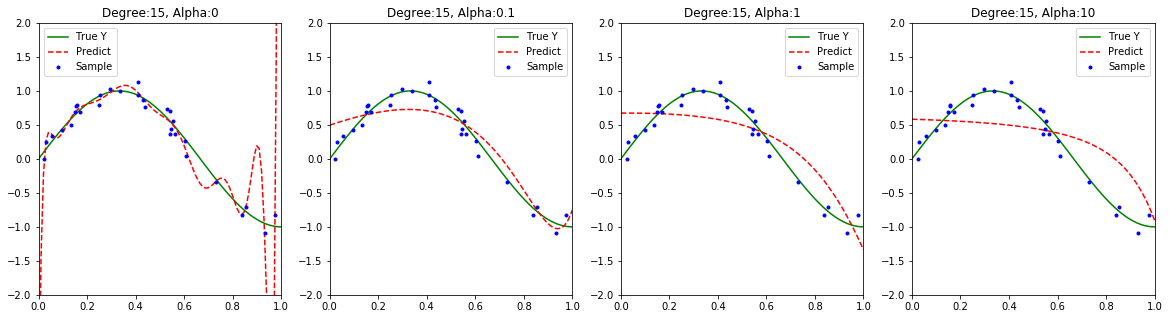

In [43]:
from sklearn.linear_model import Ridge

alphas = (0, 0.1, 1, 10)
plt.figure(figsize=(20, 5))

for i, alpha  in enumerate(alphas):
    polynomial = PolynomialFeatures(degree=15)
    ridge = Ridge(alpha=alpha)
    pipe = Pipeline([('polynomial', polynomial), ('ridge', ridge)])
    pipe.fit(X.reshape(-1,1), y)
    
    X_test = np.linspace(0,1, 100)
    plt.subplot(1, len(alphas), i+1)
    plt.plot(X_test, sin(X_test), 'g-', label='True Y')
    plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]),
             'r--', label='Predict')
    plt.plot(X, y, 'b.', label='Sample')
    plt.xlim((0,1)); plt.ylim((-2,2))
    plt.legend()
    plt.title(f"Degree:15, Alpha:{alpha}")
    
plt.show()

In [44]:
ridge01 = Ridge(alpha=0.1).fit(boston['data'], boston['target'])
ridge01_coef = pd.Series(ridge01.coef_, index=boston['feature_names'])

ridge1 = Ridge(alpha=1).fit(boston['data'], boston['target'])
ridge1_coef = pd.Series(ridge1.coef_, index=boston['feature_names'])

ridge10 = Ridge(alpha=10).fit(boston['data'], boston['target'])
ridge10_coef = pd.Series(ridge10.coef_, index=boston['feature_names'])

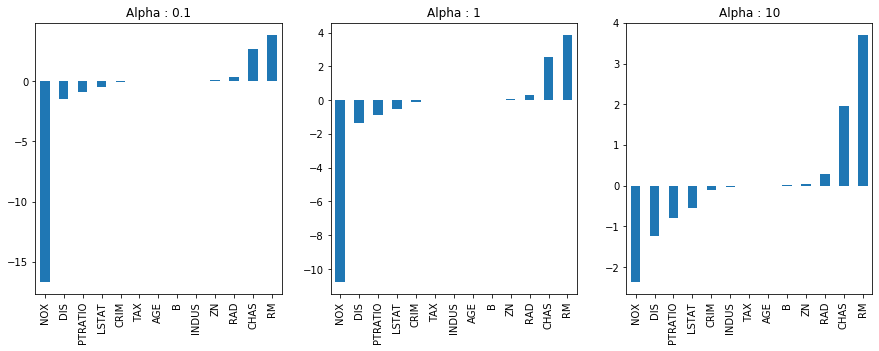

In [45]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
ridge01_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 0.1')
plt.subplot(1, 3, 2)
ridge1_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 1')
plt.subplot(1, 3, 3)
ridge10_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 10')
plt.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler
P = PolynomialFeatures(degree=3, include_bias=False)
x_scaled = MinMaxScaler().fit_transform(df.loc[:, 'CRIM':'LSTAT'])
y = df.loc[:, 'PRICE']
x_poly = P.fit_transform(x_scaled)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, -238.74562904864584)

In [48]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.2933995968826699, 0.21247966404486662)

In [49]:
lasso01 = Lasso(alpha=0.1).fit(x_train, y_train)
lasso01.score(x_train, y_train), lasso01.score(x_test, y_test)

(0.783861983129184, 0.6452299604478746)

In [50]:
lasso10 = Lasso(alpha=10).fit(x_train, y_train)
lasso10.score(x_train, y_train), lasso10.score(x_test, y_test)

(0.0, -0.001119359203955339)

In [51]:
lasso01 = Lasso(alpha=0.1).fit(boston['data'], boston['target'])
lasso01_coef = pd.Series(lasso01.coef_, index=boston['feature_names'])

lasso1 = Lasso(alpha=1).fit(boston['data'], boston['target'])
lasso1_coef = pd.Series(lasso1.coef_, index=boston['feature_names'])

lasso10 = Lasso(alpha=10).fit(boston['data'], boston['target'])
lasso10_coef = pd.Series(lasso10.coef_, index=boston['feature_names'])

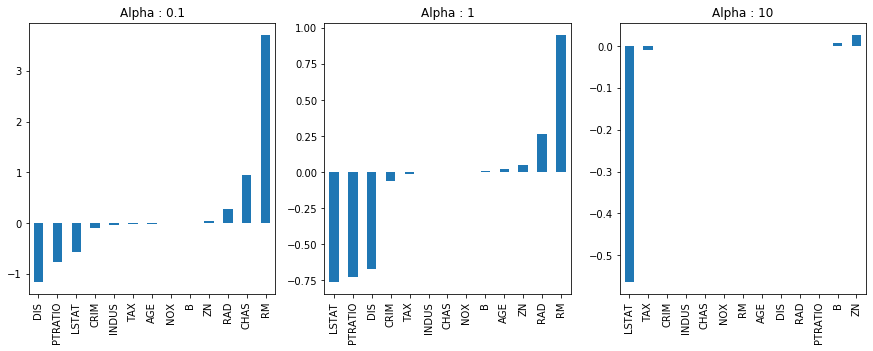

In [52]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
lasso01_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 0.1')
plt.subplot(1, 3, 2)
lasso1_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 1')
plt.subplot(1, 3, 3)
lasso10_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 10')
plt.show()

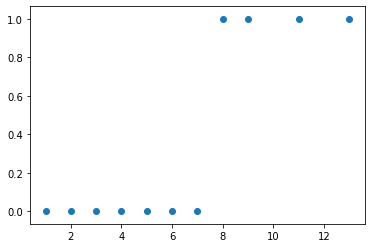

In [53]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5,6,7,8,9,11,13]) 
y = np.array([0,0,0,0,0,0,0,1,1,1,1]) 

plt.scatter(x, y)
plt.show()

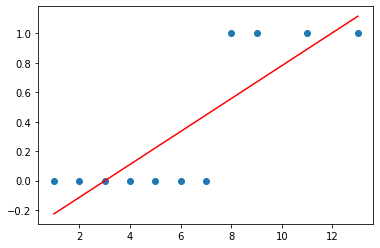

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x.reshape(-1, 1), y)
plt.scatter(x, y)
plt.plot(x, model.predict(x.reshape(-1, 1)), c='red')
plt.show()

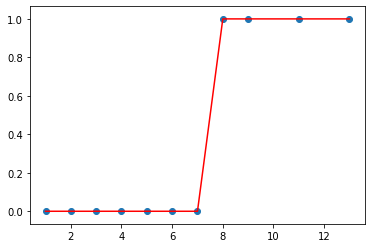

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x.reshape(-1, 1), y)
plt.scatter(x, y)
plt.plot(x, model.predict(x.reshape(-1, 1)), c='red')
plt.show()

In [56]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer['data'],
                                                    cancer['target'],
                                                    stratify=cancer['target'],
                                                    random_state=0)
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [57]:
model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9671361502347418, 0.9370629370629371)

In [58]:
model.predict(x_test)[:5]

array([1, 0, 0, 1, 0])

In [59]:
model.predict_proba(x_test)[:5]

array([[1.34392557e-02, 9.86560744e-01],
       [9.99981340e-01, 1.86600332e-05],
       [9.99993702e-01, 6.29767850e-06],
       [3.53298958e-04, 9.99646701e-01],
       [9.99540291e-01, 4.59708583e-04]])

In [60]:
model.decision_function(x_test)[:5]

array([  4.29604495, -10.88910792, -11.97532319,   7.94784259,
        -7.68445797])

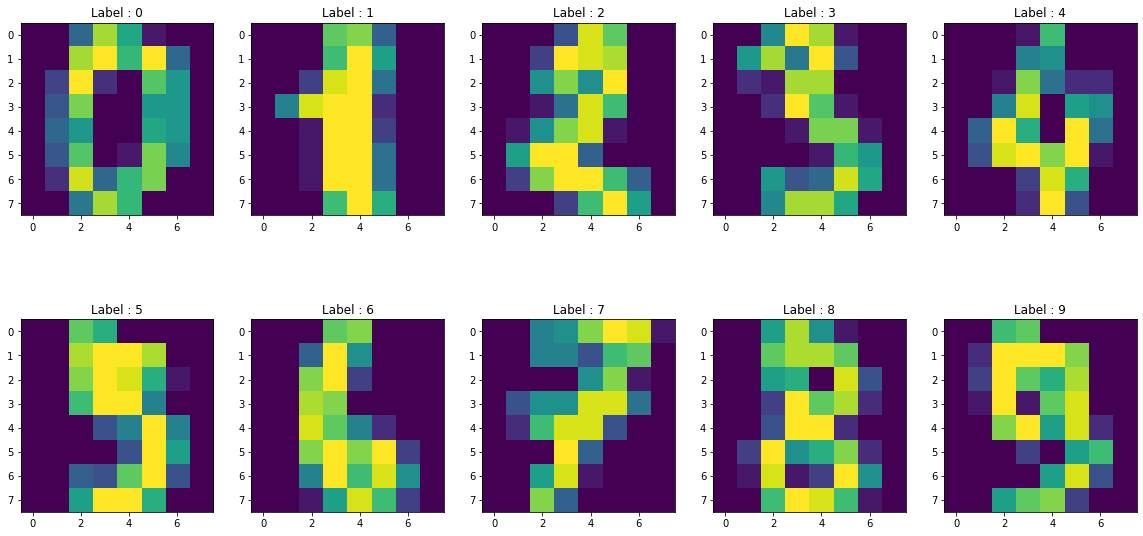

In [62]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

plt.figure(figsize=(20, 10))
for index, image in enumerate(digits['images'][:10]):
    plt.subplot(2, 5, index+1)
    plt.imshow(image)
    plt.title(f'Label : {digits.target[index]}')
plt.show()

In [63]:
x_train, x_test, y_train, y_test = train_test_split(digits['data'],
                                                    digits['target'],
                                                    stratify=digits['target'],
                                                    random_state=0)

model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9644444444444444)

In [64]:
model.predict(x_test)[:2]

array([2, 0])

In [65]:
model.predict_proba(x_test)[:2]

array([[1.64983448e-02, 1.31679437e-10, 8.17976458e-01, 1.65517164e-01,
        8.24338582e-13, 1.13589062e-09, 2.12303828e-09, 7.79234536e-06,
        1.39193727e-09, 2.36352487e-07],
       [9.99978493e-01, 1.10741896e-15, 1.62440181e-11, 8.77521064e-14,
        1.89032230e-11, 2.26273164e-07, 2.10275530e-05, 9.31343966e-11,
        2.42456792e-07, 1.03540094e-08]])

In [51]:
# 데이터 세트 준비
from sklearn.datasets import load_linnerud


# 데이터 분할


# 모델 평가 ( 가장 좋은 Regression 모델을 찾아보세요.)



dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename'])